## Calculus

Calculus is the study of the properties of functions. The operations of
calculus are used to describe the limit behaviour of functions, calculate
their rates of change, and calculate the areas under their graphs. In
this section we'll learn about the `SymPy` functions for calculating
limits, derivatives, integrals, and summations.

### Infinity

The infinity symbol is denoted `oo` (two lowercase `o`s) in `SymPy`. Infinity
is not a number but a process: the process of counting forever. Thus,
$\infty + 1 = \infty$, $\infty$ is greater than any finite number, and $1/\infty$ is an
infinitely small number. `Sympy` knows how to correctly treat infinity
in expressions:

In [78]:
oo+1

In [79]:
5000 < oo

In [80]:
1/oo

### Limits

We use limits to describe, with mathematical precision, infinitely large
quantities, infinitely small quantities, and procedures with infinitely
many steps.

The number $e$ is defined as the limit $e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n$:

In [81]:
limit( (1+1/n)**n, n, oo)

This limit expression describes the annual growth rate of a loan with
a nominal interest rate of 100% and infinitely frequent compounding.
Borrow \$1000 in such a scheme, and you'll owe $2718.28 after one year.

Limits are also useful to describe the behaviour of functions. Consider
the function $f(x) = \frac{1}{x}$. The `limit` command shows us what happens
to $f(x)$ near $x = 0$ and as $x$ goes to infinity:

In [82]:
limit( 1/x, x, 0, dir="+")

In [83]:
limit( 1/x, x, 0, dir="-")

In [84]:
limit( 1/x, x, oo)

As $x$ becomes larger and larger, the fraction $\frac{1}{x}$ becomes smaller
and smaller. In the limit where $x$ goes to infinity, $\frac{1}{x}$ approaches
zero: $\lim_{x\to\infty}\frac{1}{x} = 0$. On the other hand, when $x$ takes on smaller
and smaller positive values, the expression $\frac{1}{x}$ becomes infinite:
$\lim_{x\to0^+}\frac{1}{x} = \infty$. When $x$ approaches 0 from the left, we have
$\lim_{x\to0^-}\frac{1}{x}=-\infty$. If these calculations are not clear to you, study
the graph of $f(x) = \frac{1}{x}$.

Here are some other examples of limits:

In [85]:
limit(sin(x)/x, x, 0)

In [86]:
limit(sin(x)**2/x, x, 0)

In [87]:
limit(exp(x)/x**100,x,oo)  # which is bigger e^x or x^100 ?
                           # exp f >> all poly f for big x

Limits are used to define the derivative and the integral operations.

### Derivatives

The derivative function, denoted $f'(x)$, $\frac{d}{dx}f(x)$, $\frac{df}{dx}$, or $\frac{dy}{dx}$, 
describes the *rate of change* of the function $f(x)$.
The `SymPy` function `diff` computes the derivative of any expression:

In [88]:
diff(x**3, x)

The differentiation operation knows about the product rule $[f(x)g(x)]^\prime=f^\prime(x)g(x)+f(x)g^\prime(x)$, 
the chain rule $f(g(x))' = f'(g(x))g'(x)$, 
and the quotient rule $\left[\frac{f(x)}{g(x)}\right]^\prime = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$:

In [89]:
diff( x**2*sin(x), x )

In [90]:
diff( sin(x**2), x )

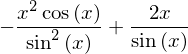

In [91]:
diff( x**2/sin(x), x )

The second derivative of a function `f` is `diff(f,x,2)`:

In [92]:
diff(x**3, x, 2)   # same as diff(diff(x**3, x), x)

The exponential function $f(x)=e^x$ is special because it is equal to its derivative:

In [93]:
diff( exp(x), x )  # same as diff( E**x, x  )

A differential equation is an equation that relates some unknown function $f(x)$ to its derivative. 
An example of a differential equation is $f'(x)=f(x)$.
What is the function $f(x)$ which is equal to its derivative?
You can either try to guess what $f(x)$ is or use the `dsolve` function:

In [94]:
x = symbols('x')
f = symbols('f', cls=Function)  # can now use f(x)
dsolve( f(x) - diff(f(x),x), f(x) )

We'll discuss `dsolve` again in the section on mechanics.

### Tangent lines

The *tangent line* to the function $f(x)$ at $x=x_0$ is 
the line that passes through the point $(x_0, f(x_0))$ and has 
the same slope as the function at that point.
The tangent line to the function $f(x)$ at the point $x=x_0$ is described by the equation

$$
   T_1(x) =  f(x_0) \ + \  f'(x_0)(x-x_0).
$$

What is the equation of the tangent line to $f(x)=\frac{1}{2}x^2$ at $x_0=1$?

In [95]:
f = S('1/2')*x**2
f

In [96]:
df = diff(f,x)
df

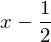

In [97]:
T_1 = f.subs({x:1}) + df.subs({x:1})*(x - 1)
T_1

The tangent line $T_1(x)$ has the same value and slope as the function $f(x)$ at $x=1$:

In [98]:
T_1.subs({x:1}) == f.subs({x:1})

True

In [99]:
diff(T_1,x).subs({x:1}) == diff(f,x).subs({x:1})

True

### Optimization

Optimization is about choosing an input for a function $f(x)$ that results in the best value for $f(x)$.
The best value usually means the *maximum* value 
(if the function represents something desirable like profits) 
or the *minimum* value 
(if the function represents something undesirable like costs).

The derivative $f'(x)$ encodes the information about the *slope* of $f(x)$.
Positive slope $f'(x)>0$ means $f(x)$ is increasing,
negative slope $f'(x)<0$ means $f(x)$ is decreasing, 
and zero slope $f'(x)=0$ means the graph of the function is horizontal.
The *critical points* of a function $f(x)$ are the solutions to the equation $f'(x)=0$.
Each critical point is a candidate to be either a maximum or a minimum of the function.

The second derivative $f^{\prime\prime}(x)$ encodes the information about the *curvature* of $f(x)$.
Positive curvature means the function looks like $x^2$,
negative curvature means the function looks like $-x^2$.

Let's find the critical points of the function $f(x)=x^3-2x^2+x$ 
and use the information from its second derivative 
to find the maximum of the function 
on the interval $x \in [0,1]$.

In [100]:
x = Symbol('x')
f = x**3-2*x**2+x
diff(f, x)

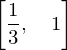

In [101]:
sols = solve( diff(f,x),  x)
sols

In [102]:
diff(diff(f,x), x).subs( {x:sols[0]} )

In [103]:
diff(diff(f,x), x).subs( {x:sols[1]} )

[It will help to look at the graph of this function.](https://www.google.com/#safe=off&q=plot+x**3-2*x**2%2Bx)
The point $x=\frac{1}{3}$ is a local maximum because it is a critical point of $f(x)$
where the curvature is negative, meaning $f(x)$ looks like the peak of a mountain at $x=\frac{1}{3}$.
The maximum value of $f(x)$ on the interval $x\in [0,1]$ is $f\!\left(\frac{1}{3}\right)=\frac{4}{27}$.
The point $x=1$ is a local minimum because it is a critical point
with positive curvature, meaning $f(x)$ looks like the bottom of a valley at $x=1$.

### Integrals

The *integral* of $f(x)$ corresponds to the computation of the area under the graph of $f(x)$.
The area under $f(x)$ between the points $x=a$ and $x=b$ is denoted as follows:

$$
 A(a,b) = \int_a^b f(x) \: dx.
$$

The *integral function* $F$ corresponds to the area calculation as a function 
of the upper limit of integration:

$$
  F(c) \equiv \int_0^c \! f(x)\:dx\,.
$$

The area under $f(x)$ between $x=a$ and $x=b$ is obtained by 
calculating the *change* in the integral function:

$$
   A(a,b) = \int_a^b \! f(x)\:dx  =  F(b)-F(a).
$$

In `SymPy` we use `integrate(f, x)` to obtain the integral function $F(x)$ of any function $f(x)$:
$F(x) = \int_0^x f(u)\,du$.

In [104]:
integrate(x**3, x)

In [105]:
integrate(sin(x), x)

In [106]:
integrate(ln(x), x)

This is known as an *indefinite integral* since the limits of integration are not defined. 

In contrast, 
a *definite integral* computes the area under $f(x)$ between $x=a$ and $x=b$.
Use `integrate(f, (x,a,b))` to compute the definite integrals of the form $A(a,b)=\int_a^b f(x) \, dx$:

In [107]:
integrate(x**3, (x,0,1))  # the area under x^3 from x=0 to x=1

We can obtain the same area by first calculating the indefinite integral $F(c)=\int_0^c \!f(x)\,dx$,
then using $A(a,b) = F(x)\big\vert_a^b \equiv F(b) - F(a)$:

In [108]:
F = integrate(x**3, x)
F.subs({x:1}) - F.subs({x:0})

Integrals correspond to *signed* area calculations:

In [109]:
integrate(sin(x), (x,0,pi))

In [110]:
integrate(sin(x), (x,pi,2*pi))

In [111]:
integrate(sin(x), (x,0,2*pi))

During the first half of its $2\pi$-cycle,
the graph of $\sin(x)$ is above the $x$-axis, so it has a positive contribution to the area under the curve.
During the second half of its cycle (from $x=\pi$ to $x=2\pi$),
$\sin(x)$ is below the $x$-axis, so it contributes negative area.
Draw a graph of $\sin(x)$ to see what is going on.

### Fundamental theorem of calculus

The integral is the &ldquo;inverse operation&rdquo; of the derivative.
If you perform the integral operation followed by the derivative operation on some function, 
you'll obtain the same function:

$$
  \left(\frac{d}{dx} \circ \int dx \right) f(x) \equiv \frac{d}{dx} \int_c^x f(u)\:du = f(x).
$$

In [112]:
f = x**2
F = integrate(f, x)
F

In [113]:
diff(F,x)

Alternately, if you compute the derivative of a function followed by the integral,
you will obtain the original function $f(x)$ (up to a constant):

$$
  \left( \int dx \circ \frac{d}{dx}\right) f(x) \equiv \int_c^x f'(u)\;du = f(x) + C.
$$

In [114]:
f = x**2
df = diff(f,x)
df

In [115]:
integrate(df, x)

The fundamental theorem of calculus is important because it tells us how to solve differential equations.
If we have to solve for $f(x)$ in the differential equation $\frac{d}{dx}f(x) = g(x)$,
we can take the integral on both sides of the equation to obtain the answer $f(x) = \int g(x)\,dx + C$.

### Sequences

Sequences are functions that take whole numbers as inputs.
Instead of continuous inputs $x\in \mathbb{R}$,
sequences take natural numbers $n\in\mathbb{N}$ as inputs.
We denote sequences as $a_n$ instead of the usual function notation $a(n)$.

We define a sequence by specifying an expression for its $n^\mathrm{th}$ term:

In [116]:
a_n = 1/n
b_n = 1/factorial(n)

Substitute the desired value of $n$ to see the value of the $n^\mathrm{th}$ term:

In [117]:
a_n.subs({n:5})

The `Python` list comprehension syntax `[item for item in list]`
can be used to print the sequence values for some range of indices:

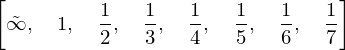

In [118]:
[ a_n.subs({n:i}) for i in range(0,8) ]

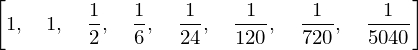

In [119]:
[ b_n.subs({n:i}) for i in range(0,8) ]

Observe that $a_n$ is not properly defined for $n=0$ since $\frac{1}{0}$ is a division-by-zero error.
To be precise, we should say $a_n$'s domain is the positive naturals $a_n:\mathbb{N}^+ \to \mathbb{R}$.
Observe how quickly the `factorial` function $n!=1\cdot2\cdot3\cdots(n-1)\cdot n$ grows:
$7!= 5040$, $10!=3628800$, $20! > 10^{18}$.

We're often interested in calculating the limits of sequences as $n\to \infty$.
What happens to the terms in the sequence when $n$ becomes large?

In [120]:
limit(a_n, n, oo)

In [121]:
limit(b_n, n, oo)

Both $a_n=\frac{1}{n}$ and $b_n = \frac{1}{n!}$ *converge* to $0$ as $n\to\infty$. 

Many important math quantities are defined as limit expressions.
An interesting example to consider is the number $\pi$, 
which is defined as the area of a circle of radius $1$.
We can approximate the area of the unit circle by drawing a many-sided regular polygon around the circle.
Splitting the $n$-sided regular polygon into identical triangular splices,
we can obtain a formula for its area $A_n$.
In the limit as $n\to \infty$, 
the $n$-sided-polygon approximation to the area of the unit-circle becomes exact:

In [122]:
A_n = n*tan(2*pi/(2*n))
limit(A_n, n, oo)

### Series

Suppose we're given a sequence $a_n$ and we want to compute the sum of all the values in this sequence $\sum_{n}^\infty a_n$.
Series are sums of sequences.
Summing the values of a sequence $a_n:\mathbb{N}\to \mathbb{R}$
is analogous to taking the integral of a function $f:\mathbb{R}\to \mathbb{R}$.

To work with series in `SymPy`,
use the `summation` function whose syntax is analogous to the `integrate` function: 

In [123]:
a_n = 1/n
summation(a_n, [n, 1, oo])

In [124]:
b_n = 1/factorial(n)
summation(b_n, [n, 0, oo])

We say the series $\sum a_n$ *diverges* to infinity (or *is divergent*) while the series $\sum b_n$ converges (or *is convergent*).
As we sum together more and more terms of the sequence $b_n$, the total becomes closer and closer to some finite number.
In this case, the infinite sum $\sum_{n=0}^\infty \frac{1}{n!}$ converges to the number $e=2.71828\ldots$.


The `summation` command is useful because it allows us to compute `infinite` sums,
but for most practical applications we don't need to take an infinite number of terms in a series to obtain a good approximation. 
This is why series are so neat: they represent a great way to obtain approximations.

Using standard `Python` commands,  
we can obtain an approximation to $e$ that is accurate to six decimals by summing 10 terms in the series:

In [125]:
import math
def b_nf(n): 
    return 1.0/math.factorial(n)
sum( [b_nf(n) for n in range(0,10)] )

In [126]:
E.evalf()  # true value

### Taylor series

Wait, there's more! 
Not only can we use series to approximate numbers,
we can also use them to approximate functions.

A *power series* is a series whose terms contain different powers of the variable $x$.
The $n^\mathrm{th}$ term in a power series is a function of both the sequence index $n$ and the input variable $x$.

For example, the power series of the function $\exp(x)=e^x$ is 

$$
 \exp(x) \equiv  1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \cdots         
  =       \sum_{n=0}^\infty \frac{x^n}{n!}.
$$

This is, IMHO, one of the most important ideas in calculus:
you can compute the value of $\exp(5)$ by taking the infinite sum of the terms in the power series with $x=5$:

In [127]:
exp_xn = x**n/factorial(n)
summation( exp_xn.subs({x:5}), [n, 0, oo] ).evalf()

In [128]:
exp(5).evalf()  # the true value

Note that `SymPy` is actually smart enough to recognize that the infinite series
you're computing corresponds to the closed-form expression $e^5$:

In [129]:
summation( exp_xn.subs({x:5}), [n, 0, oo])

Taking as few as 35 terms in the series is sufficient to obtain an approximation to $e$
that is accurate to 16 decimals:

In [130]:
import math  # redo using only python 
def exp_xnf(x,n): 
    return x**n/math.factorial(n)
sum( [exp_xnf(5.0,i) for i in range(0,35)] )

The coefficients in the power series of a function (also known as the *Taylor series*) 
The formula for the $n^\mathrm{th}$ term in the Taylor series of $f(x)$ expanded at $x=c$ is $a_n(x) = \frac{f^{(n)}(c)}{n!}(x-c)^n$,
where $f^{(n)}(c)$ is the value of the $n^\mathrm{th}$ derivative of $f(x)$ evaluated at $x=c$.
The term *Maclaurin series* refers to Taylor series expansions at $x=0$.

The `SymPy` function `series` is a convenient way to obtain the series of any function.
Calling `series(expr,var,at,nmax)` 
will show you the series expansion of `expr` 
near `var`=`at` 
up to power `nmax`:

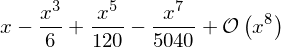

In [131]:
series( sin(x), x, 0, 8)

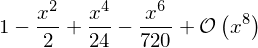

In [132]:
series( cos(x), x, 0, 8)

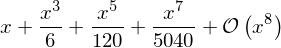

In [133]:
series( sinh(x), x, 0, 8)

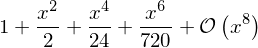

In [134]:
series( cosh(x), x, 0, 8)

Some functions are not defined at $x=0$, so we expand them at a different value of $x$.
For example, the power series of $\ln(x)$ expanded at $x=1$ is

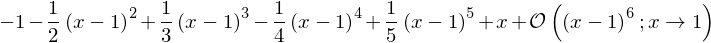

In [135]:
series(ln(x), x, 1, 6)  # Taylor series of ln(x) at x=1

Here, the result `SymPy` returns is misleading.
The Taylor series of $\ln(x)$ expanded at $x=1$ has terms of the form $(x-1)^n$:

$$
  \ln(x) = (x-1) - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \frac{(x-1)^5}{5} + \cdots.
$$

Verify this is the correct formula by substituting $x=1$.
`SymPy` returns an answer in terms of coordinates `relative` to $x=1$.

Instead of expanding $\ln(x)$ around $x=1$,
we can obtain an equivalent expression if we expand $\ln(x+1)$ around $x=0$:

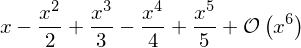

In [136]:
series(ln(x+1), x, 0, 6)  # Maclaurin series of ln(x+1)